# Using Real-World Images

In [39]:
# baixando os dados
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-16 19:25:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   167MB/s    in 0.9s    

2021-01-16 19:25:20 (167 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [40]:
import os 
import zipfile
# extraindo os dados
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [41]:
# imagens de treinamento para a classe humanos
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# imagem de treinamento para a classe cavalos
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [42]:
# extraindo os rótulos
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse41-3.png', 'horse26-1.png', 'horse32-0.png', 'horse49-3.png', 'horse03-0.png', 'horse35-4.png', 'horse05-2.png', 'horse36-3.png', 'horse17-6.png', 'horse40-4.png']
['human04-15.png', 'human05-20.png', 'human13-14.png', 'human05-21.png', 'human12-29.png', 'human08-08.png', 'human07-08.png', 'human15-15.png', 'human12-03.png', 'human03-02.png']


In [43]:
# visualizando a quantidade de imagens treinaveis
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parâmetros para construção do gráfico
nrows = 4
ncols = 4

# flag para iterar sobre as imagens
pic_index = 0

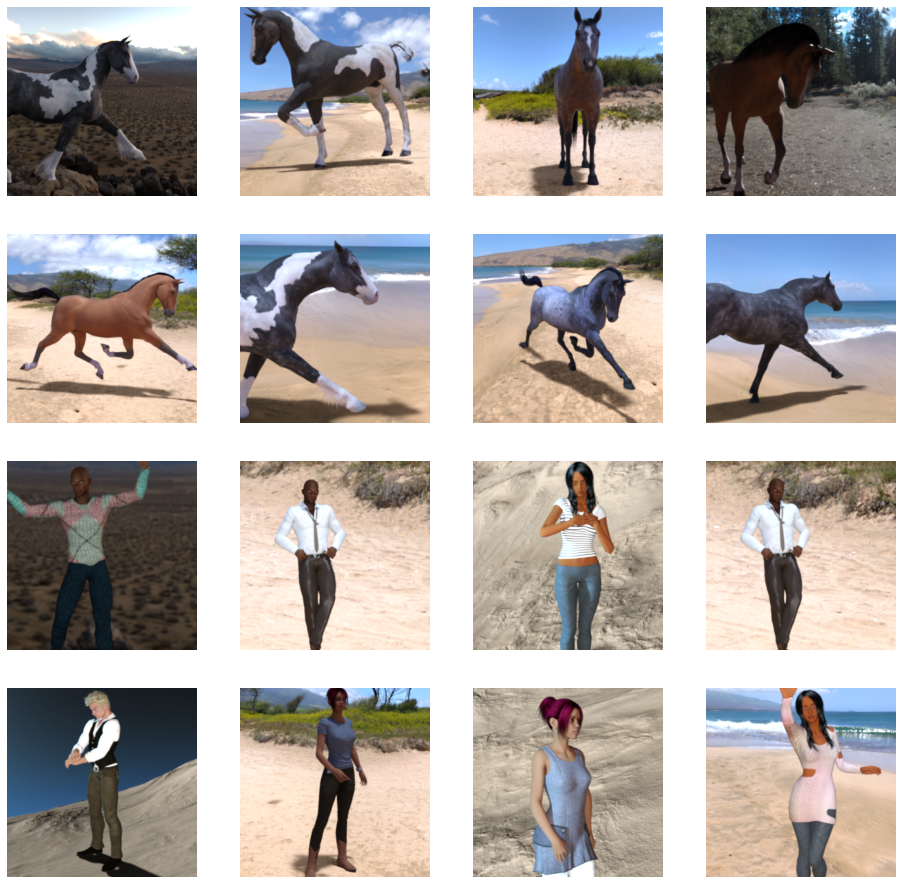

In [45]:
# configurando o matplotlib, e organizando as dimensões para 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # configurando as subplotagens; so indice do subplot começa em 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # não mostra as linhas de gráfico

  img = mpimg.imread(img_path)
  plt.imshow(img)

# visualizando algumas imagens do dataset
plt.show()


In [46]:
# importando o framework tensorflow
import tensorflow as tf

In [47]:
# configurações do modelo de rede neural convolucional
model = tf.keras.models.Sequential([
                                    # primeira camada de convolução
                                    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = tf.nn.relu, input_shape = (300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    # segunda camada de convolução
                                    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    # terceira camada de convolução
                                    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    # quarta camada de convolução
                                    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    # quinta camada de convolução
                                    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                    # camada oculta densa
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
                                    # camada oculta de saída
                                    tf.keras.layers.Dense(units = 1, activation = tf.nn.sigmoid)

])

In [48]:
# visualizando os detalhes do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [49]:
# importando o otimizador para atualização dos parâmetros
from tensorflow.keras.optimizers import RMSprop

# detalhes da compilação do modelo
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [50]:
# importando o processador de imagens do tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# processando as imagens de treinamento para ficarem no mesmo formato
train_datagen = ImageDataGenerator(rescale = 1/255)

# para 

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Fluxo de imagens de treinamento em lotes de 128 usando train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # diretório onde as imagens estão localizadas
        target_size = (300, 300),  # Todas as imagens serão redimensionadas para 300x300
        batch_size = 128,
        # Já que está sendo usando uma função de perda binary_crossentropy, precisamos de rótulos binários
        class_mode = 'binary')


Found 1027 images belonging to 2 classes.


In [52]:
# vendo os passos por época para passar lotes de imagens
1027 // 128

8

In [53]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.999):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [54]:
history = model.fit(
      train_generator,
      steps_per_epoch = 8,  
      epochs = 20,
      callbacks = [callbacks],
      verbose = 1)

Epoch 1/20
8/8 [==============================] - 7s 701ms/step - loss: 0.9044 - accuracy: 0.5076
Epoch 2/20
8/8 [==============================] - 6s 702ms/step - loss: 0.7763 - accuracy: 0.6408
Epoch 3/20
8/8 [==============================] - 6s 692ms/step - loss: 0.8442 - accuracy: 0.8369
Epoch 4/20
8/8 [==============================] - 6s 707ms/step - loss: 0.5848 - accuracy: 0.7372
Epoch 5/20
8/8 [==============================] - 6s 712ms/step - loss: 0.2750 - accuracy: 0.9111
Epoch 6/20
8/8 [==============================] - 6s 811ms/step - loss: 0.3317 - accuracy: 0.8996
Epoch 7/20
8/8 [==============================] - 6s 696ms/step - loss: 0.3473 - accuracy: 0.9102
Epoch 8/20
8/8 [==============================] - 6s 684ms/step - loss: 0.1263 - accuracy: 0.9690
Epoch 9/20
8/8 [==============================] - 6s 692ms/step - loss: 0.5817 - accuracy: 0.8612
Epoch 10/20
8/8 [==============================] - 6s 704ms/step - loss: 0.1291 - accuracy: 0.9584
Epoch 11/20
8/8 [==

In [55]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # fazendo a predição com imagens
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving download.jpg to download (2).jpg
[0.]
download.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


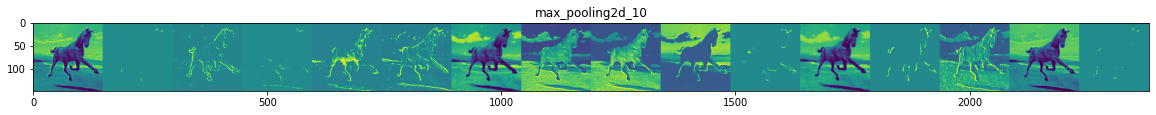

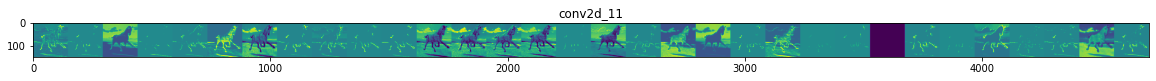

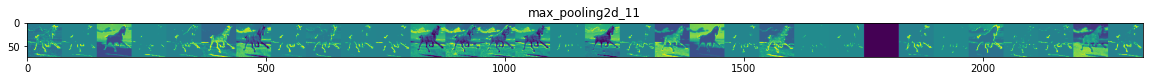

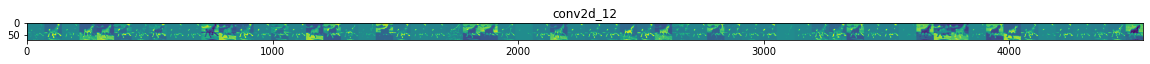

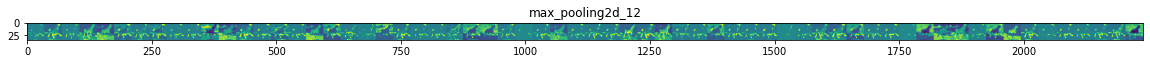

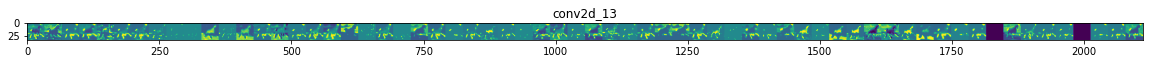

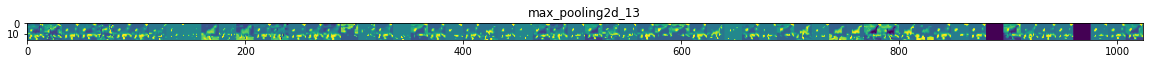

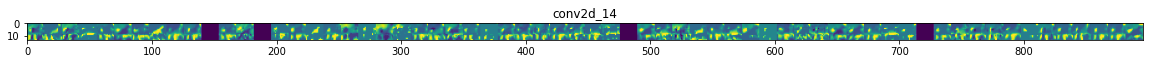

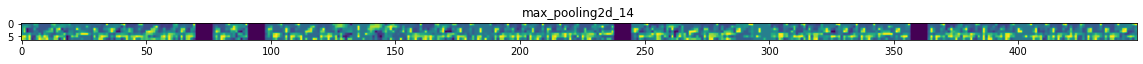

In [56]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')